In [1]:
import auxiliaries               
from auxiliaries import ew_abs_lines, adjust_model, convol_by_psf,convolve_model_with_psf
import build_matrix_des
from build_matrix_des import build_matrix_DES
from __future__ import annotations

from dataclasses import dataclass
from typing import Optional,Tuple, Iterable
import numpy as np
import matplotlib.pyplot as plt

In [2]:
lam_obs=np.loadtxt("lamHD40111.csv", delimiter=",", dtype=float,skiprows=1)
flux_obs=np.loadtxt("HD40111.csv", delimiter=",", dtype=float, skiprows=1)
lam_mod = np.loadtxt("lam_mod_o2.csv", delimiter=",", dtype=float, skiprows=1)
trans_mod = np.loadtxt("tr_mod_o2.csv", delimiter=",", dtype=float, skiprows=1)

First, it is necessary to bring the model to the data in terms of equivalent width. Function ```adjust_model``` do it

In [3]:
adjust_result=adjust_model(lam_mod,trans_mod,lam_obs,flux_obs,6296.8,6312.9)

In [4]:
ew_abs_lines(lam_obs,flux_obs,6296.8,6312.9)

0.20788713500013403

In [5]:
ew_abs_lines(lam_mod,adjust_result["y_model_scaled"],6296.8,6312.9)

0.20799802483447594

In [6]:
0.20799802483447594/0.20788713500013403
#Acceptable

1.000533413644581

In [7]:
tr_mod_scaled=adjust_result["y_model_scaled"]

Once model is adjusted to the data it is possible to start ```build_matrix_DES``` function, which will return the best PSF  
IMPORTANT BEFORE  PROCEEDING
1. Adjust the TAPAS transmittance in such a way the  EW (equivalent width) of model absorptions is similar to the one of observed absorptions  this can be done by elevating the tapas transmittance at a power x (except for points for which tapas=0)
2. Normalize the data in the used interval in such a way data=1 outside the lines

In [8]:
DES_result=build_matrix_DES(307441,308850,101,0.25,flux_obs,lam_obs,tr_mod_scaled,lam_mod)

It is possible to examine the output of each step of ```build_matrix_DES```. For more information you can read the .py file

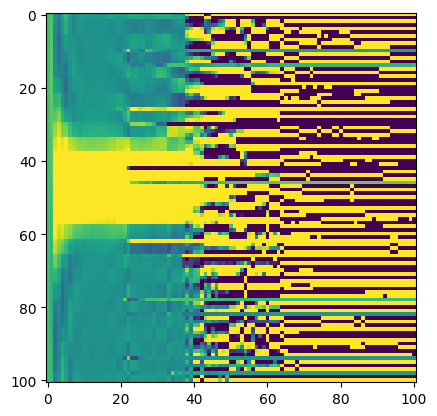

In [9]:
plt.imshow(DES_result.b_profiles, interpolation='none',vmin=-10, vmax=10)
plt.show()

In [10]:
b=DES_result.b_profiles

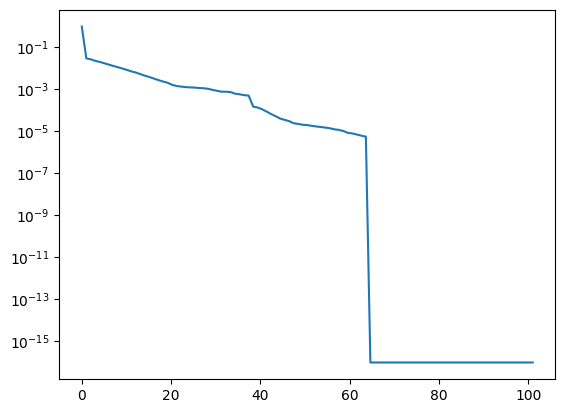

In [12]:
fig, ax = plt.subplots()
ax.plot(np.linspace(0,101,101),DES_result.S)
ax.set_yscale('log')


In [13]:
build_matrix_des._search_best_line_and_psf(b)

(6,
 11,
 array([0.0012615 , 0.00118273, 0.00072876, 0.00073525, 0.00074175,
        0.00074824, 0.00086427, 0.00085837, 0.00085248, 0.00084658,
        0.00085577, 0.00056587, 0.00054664, 0.00052741, 0.00036108,
        0.00043712, 0.00044572, 0.00045432, 0.00076409, 0.00080759,
        0.0008511 , 0.0008946 , 0.0016613 , 0.00173062, 0.00179995,
        0.00186928, 0.00274355, 0.00296424, 0.00306568, 0.00316711,
        0.00509475, 0.00587754, 0.00621916, 0.00656078, 0.01383416,
        0.01466731, 0.01550046, 0.01633361, 0.02975856, 0.0309044 ,
        0.03205024, 0.03319608, 0.04042202, 0.0476153 , 0.04838064,
        0.04914598, 0.05314832, 0.05375218, 0.05359523, 0.05343828,
        0.04579853, 0.04480366, 0.04380879, 0.04281392, 0.02770203,
        0.02651847, 0.02533492, 0.02415137, 0.01093367, 0.01020732,
        0.00948098, 0.00875463, 0.00397834, 0.00260862, 0.00241192,
        0.00221522, 0.00108133, 0.00124588, 0.00124622, 0.00124656,
        0.00129735, 0.00128326, 0.00126